#Zahra Ghahremani

Midterm CS534

# Question 1

(20 points) Design and implement an iterative Power Method approach to
determine the first principal component of the PCA transformation.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
%matplotlib inline
from time import time
from scipy import stats
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split , StratifiedKFold, KFold, cross_validate, learning_curve, GridSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Power method

The power method is an iterative method for approximating eigenvectors. Let's assume that we have matrix A that has an eigenvalue and eigenvectors. To find eigenvalues with this method, we need to start by assuming x0 (a nonzero vector in Rn) as one of the eigenvectors for matrix A. Now, we create the following sequence:

 x1 = Ax0

x2 = Ax1 = A(Ax0) = A^2 x0

x3 = Ax2 = A(A^2 x0) = A^3 x0

......

xk = A xk-1 = A(A^(k-1)x0) = A^k x0

If we scale this sequence, we will have a good estimation of the eigenvector of A.

In [4]:
# Load the Iris dataset
dataset = pd.read_csv('/content/drive/MyDrive/Spring 2022-MS-Semester2/ML/Notebooks/Copy of iris.csv')
dataset.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
dataset_data = dataset.drop(columns = ['species'])
dataset_target = dataset.drop(columns=['sepal length', 'sepal width', 'petal length', 'petal width'] )
print(dataset.head())

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
# Normalize
mean = np.mean(dataset_data, axis = 0)
scale = np.std(dataset_data, axis = 0)
dataset_data_std = (dataset_data - mean) / scale
dataset_data_std = dataset_data_std.to_numpy()
dataset_data_std.shape

(150, 4)

In [8]:
# Computing eigenvalues and eigenvectors
import numpy.linalg as la
Matrix = dataset_data_std.T @ dataset_data_std
X0 = np.matrix([1,1,1, 1]).T
iterations = 4

for i in range (iterations):
    Matrix = Matrix*Matrix

x = Matrix*X0
norm = la.norm(x)
Evalue = x/norm
Evector = la.eig(Matrix)[1]
print('Eigenvalue: \n',Evalue.flatten())
print('Eigenvector:\n',Evector)

Eigenvalue: 
 [[0.41819202 0.36320386 0.60149783 0.57567243]]
Eigenvector:
 [[-1.86822598e-01 -9.28633736e-02  9.77994740e-01  5.14664049e-06]
 [-1.26832669e-06 -1.14954505e-06  4.91100572e-06 -1.00000000e+00]
 [-7.00614933e-01  7.10445503e-01 -6.63769785e-02 -2.54058211e-07]
 [-6.88647974e-01 -6.97598439e-01 -1.97788741e-01  7.04009797e-07]]


In [ ]:
Evector[:,0]

array([-1.86822598e-01, -1.26832669e-06, -7.00614933e-01, -6.88647974e-01])

In [ ]:
# PC1
PC_1 = dataset_data_std @ Evector[:,0]
print('First PC:\n%s'% PC_1)

First PC:
[ 2.01216053  2.05743579  2.14254995  2.08550522  2.03479713  1.64364859
  2.03480671  1.99495676  2.17062056  2.10813313  1.90440829  2.00038959
  2.17061128  2.40331864  1.93338271  1.65541836  1.80301244  1.92162193
  1.66627679  1.88178009  1.82472725  1.79124179  2.28470856  1.62102245
  1.8808667   1.95511697  1.7740386   1.94968267  1.98952392  2.02302707
  2.00039047  1.72333198  2.0402195   1.92161089  2.10813313  2.11448023
  1.9614539   2.10813313  2.21046123  1.97231986  1.98409979  2.09728779
  2.21046064  1.59296112  1.63187765  1.98953409  1.93247772  2.12534589
  1.92704519  2.03479801 -0.81915448 -0.69418978 -0.96673781 -0.11017307
 -0.75666646 -0.35465314 -0.84177369  0.57615053 -0.59822646 -0.09296119
  0.47383288 -0.46148182  0.04825852 -0.61542154  0.02655212 -0.63172062
 -0.51309402  0.05368989 -0.64891305  0.08810759 -0.97214396 -0.24599592
 -0.83091467 -0.43434405 -0.43342978 -0.60908343 -0.81372048 -1.14238187
 -0.60364131  0.31537285  0.15058575  0.2

# Question 2

(20 points) Design and implement an iterative Power Method
approach to determine the second principal component of the PCA
transformation.

Theory is written in question 1

In [ ]:
# PC2
PC_2 = dataset_data_std @ Evector[:,1]
print('Second PC:\n%s'% PC_2)

Second PC:
[ 0.04666867  0.06917412  0.05127772  0.14333001  0.05792046 -0.04931929
  0.01121389  0.09832098  0.12543467  0.20128917  0.05331195  0.16122508
  0.17214151  0.10720185 -0.11289703 -0.16387676 -0.21091922 -0.04504667
  0.00864014 -0.00464748  0.13411272 -0.09636255 -0.05867124 -0.10727686
  0.28242503  0.13872203 -0.04470971  0.0758166   0.03541688  0.17247767
  0.16122588 -0.13011793  0.16753034  0.00165858  0.20128917 -0.02287844
 -0.03873954  0.20128917  0.08503442  0.08706892 -0.07419459 -0.01793111
  0.08503389 -0.22814066  0.06523712 -0.01128916  0.12746784  0.10292976
  0.06456401  0.05792126  0.06549578 -0.03950718  0.06583273  0.04319449
 -0.01035819  0.22268896 -0.03917076  0.10305269  0.16182016 -0.05516573
  0.17260167 -0.10444631  0.26208048  0.16676509 -0.1296591  -0.02194773
  0.05050981  0.32498325 -0.01700041  0.17497259 -0.13719296 -0.02431919
  0.13334667  0.35019604  0.06312433 -0.01069541  0.12840094 -0.05469358
  0.00550185  0.09383567  0.14582493  0.

In [ ]:
pc = pd.DataFrame({'pc1': pd.Series(dataset_data_std @ Evector[:,0]),
                   'pc2': pd.Series(dataset_data_std @ Evector[:,1]),
                   'pc3': pd.Series(dataset_data_std @ Evector[:,2]),
                   'pc4': pd.Series(dataset_data_std @ Evector[:,3])})
pc.corr()[['pc1', 'pc2','pc3','pc4']]

,pc1,pc2,pc3,pc4
pc1,1.000000,0.337554,-0.782903,-0.364321
pc2,0.337554,1.000000,-0.153287,0.208270
pc3,-0.782903,-0.153287,1.000000,0.011051
pc4,-0.364321,0.208270,0.011051,1.000000


# Problem Number 3

 (10 points) Describe the benefit of a gradient approach w.r.t.
the SVD approach for the PCA transformation

Gradient approuch

In this method, we can consider all data in computation since this method calculates the gradiant of the objective function. It also updates primary vectors to the reverse direction. 
 Gradient approuch computes the gradient of the objective function and the initial vectors are updated to the reverse direction of the gradient, therefore all data are considered in computation. This method is fast and memory-efficient since it computes the gradient stochasticaly.
 
 SVD approach

 When we have a large ammount of feature we can use truncated version of this method that is fast but it is not accurate since it can give us only some of PCs. We can also use full-rank SVD in this situation but it is expensive (computationaly).  Generally, for machine learning, SVD is better than other eigenvalue decomposition methods.

Benefit of Gradient approach

1-Since gradient method is not product of two, it is easier to calculate covarience matrix in this method (compare to SVD that has a power of two). 2-It is not necessary to compute all PCs at once for this method (it can calculate PCs separately) but SVD calculate all PCs at once. All in all, gradient method is faster and memory-efficient because it does not use all data at once (SVD method, truncated and full-rank, uses all data for computing PCs).


# Question 4

(20 points) Using a binary classifier (logistic regression or
SVM) please implement in python both of the 2 different approaches
(one vs. one, one vs. all) to handle the problem of more
than two different classes (use the iris dataset). For
reference use the following link
https://en.wikipedia.org/wiki/Multiclass_classification


# one vs. one

In [ ]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#labeling the species numerically
dataset.loc[dataset.species == 'Iris-setosa', 'species'] = 0
dataset.loc[dataset.species == 'Iris-virginica', 'species'] = 1
dataset.loc[dataset.species == 'Iris-versicolor', 'species'] = 2
dataset.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# An standard class
class standardizer():
  def __init__(self):
    self.std = 0
  def STD(self, data):
    mean = np.mean(data, axis = 0)
    scale = np.std(data, axis = 0)
    self.std = (data-mean) / scale
    return self.std


In [ ]:
# test and train
dataset_train = dataset.sample(frac = 0.8, random_state = 10)
test_mask = pd.Series(True, index = dataset.index)
print(test_mask)
test_mask[dataset_train.index] = False 
print(test_mask)
dataset_test = dataset[test_mask]
dataset_data_test = dataset_test.drop('species', axis = 1)
stand = standardizer()
dataset_data_test_std = stand.STD(dataset_data_test)
dataset_target_test = dataset_test.drop(labels = ['sepal length', 'sepal width', 'petal length', 'petal width'], axis = 1).astype('int')

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool
0       True
1      False
2      False
3      False
4      False
       ...  
145     True
146    False
147    False
148     True
149    False
Length: 150, dtype: bool


In [ ]:
# Make prediction by logestic regression
decision = []
pd.set_option('display.max_rows', 80)

for Class in range(3):
  dataset_train_new = dataset_train.loc[dataset_train.species != Class]
  data = dataset_train_new.drop('species', axis = 1)

  target = dataset_train_new.drop(labels = ['sepal length', 'sepal width', 'petal length', 'petal width'], axis = 1).astype('int')
  data_std = stand.STD(data)
  # print(data_std)
  # print(len(data_std))
  # print(len(target))
  # print(target)
  model = LogisticRegression(penalty = 'l2', C = 0.001, solver = 'liblinear').fit(data_std, target)  
  decision.append(model.predict(dataset_data_test_std))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Finding best class
decision_T = np.array(decision).T
Predictions = stats.mode(decision_T, axis = 1)
#print(Predictions)

In [ ]:
# Test accuracy
accuracy_score(dataset_target_test, Predictions[0])

0.8

# one vs. other

In [ ]:
dataset_train_new.head()

,sepal length,sepal width,petal length,petal width,species
111,6.4,2.7,5.3,1.9,1
10,5.4,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0
39,5.1,3.4,1.5,0.2,0
142,5.8,2.7,5.1,1.9,1


In [ ]:
#Using logestic regression for prediction
decision = []
dataset_train_new = []
for Class in range(3):
  dataset_train_new = dataset_train.copy()
  dataset_train_new.loc[dataset_train_new.species != Class, 'species'] = 5
  data = dataset_train_new.drop('species', axis = 1)
  target = dataset_train_new.drop(labels = ['sepal length', 'sepal width', 'petal length', 'petal width'], axis = 1).astype('int')
  data_std = stand.STD(data)
  model = LogisticRegression(penalty = 'l2', C = 0.001, solver = 'liblinear').fit(data_std, target)
  model_probability = model.predict_proba(dataset_data_test_std) [:,0]
  decision.append(model_probability)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Finding best class
decision_T = np.array(decision).T
Predictions = np.argmax(decision_T, axis = 1)
#print(Predictions)

In [ ]:
# Test accuracy
accuracy_score(dataset_target_test, Predictions)

0.8333333333333334

# Question 5

(20 points) Extensively describe the overfitting and
underfitting problem. Use execution examples with a decision
tree and SVM (with or without kernel). Use the scikit
implementations. Show underfitting, good behavior, and overfitting examples.

#Decision Trees

In this problem I use a 2D dataset including 1500 samples, each one is one of two classes (0 or 1).
3 Gaussian distributions generate samples in class 1 (centered at [6,14], [10,6], and [14 14]). 

An uniform distribution in a square region generate data in class 0 (length of sides is equal to 20).

In [ ]:
#Importing data
def data_generate(size):
  N = size #6000
  mean1 = [6, 14]
  mean2 = [10, 6]
  mean3 = [14, 14]
  cov = [[3.5, 0], [0, 3.5]]
  np.random.seed(50)
  data = np.random.multivariate_normal(mean1, cov, int(N/6))
  data = np.concatenate((data, np.random.multivariate_normal(mean2, cov, int(N/6))))
  data = np.concatenate((data, np.random.multivariate_normal(mean3, cov, int(N/6))))
  data = np.concatenate((data, 20*np.random.rand(int(N/2),2)))
  target = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))
  return data, target

In [ ]:
#Building the model

data, target = data_generate(6000)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=10)
                                                                    
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model_fit = model.fit(data_train, target_train)
    target_predTrain = model_fit.predict(data_train)
    target_predTest = model_fit.predict(data_test)
    trainAcc[index] = accuracy_score(target_train, target_predTrain)
    testAcc[index] = accuracy_score(target_test, target_predTest)
    index += 1

Text(0, 0.5, 'Accuracy')

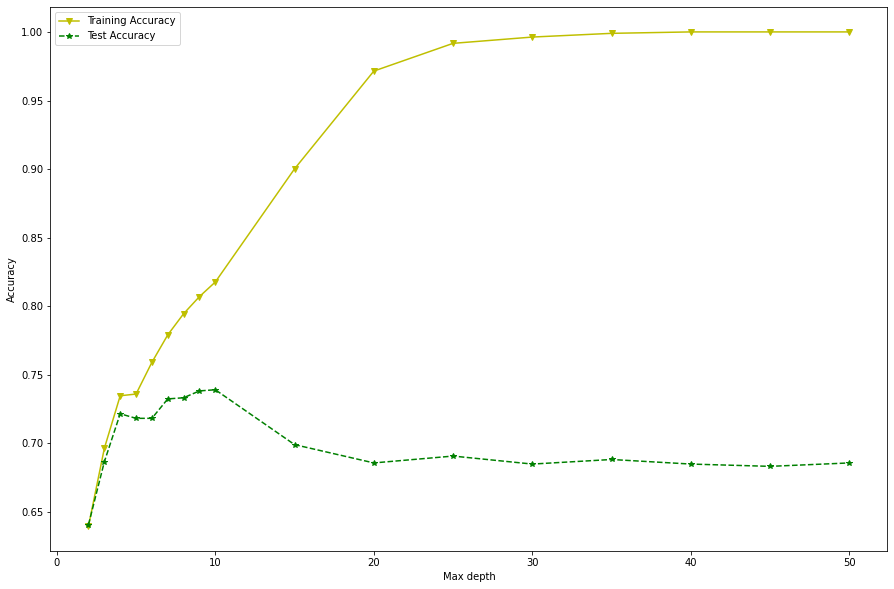

In [ ]:
# ploting the result
fig = plt.figure(figsize=(15, 10))
plt.plot(maxdepths,trainAcc,'yv-',maxdepths,testAcc,'g*--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')



Overfitting: 

overfitting is when training data is accurate but test data is less accurate, in anather word, when model is learning "too much" from the tarining dataset.
We can see in the plot that training accuracy is increasing but the test accuracy decreases after tree depth of 4. This means that after depth of 4, we have overfitting of the model in training.

Underfitting:
This is when both the training accuracy and the test accuracy is low and model has "not learned enough". Results in this case are unreliable. In this plot, depth tree less than 4 can be considered as underfitting because test accuracy is below its max value and model has not learned enough.


#support vector machines

Text(0, 0.5, 'Accuracy')

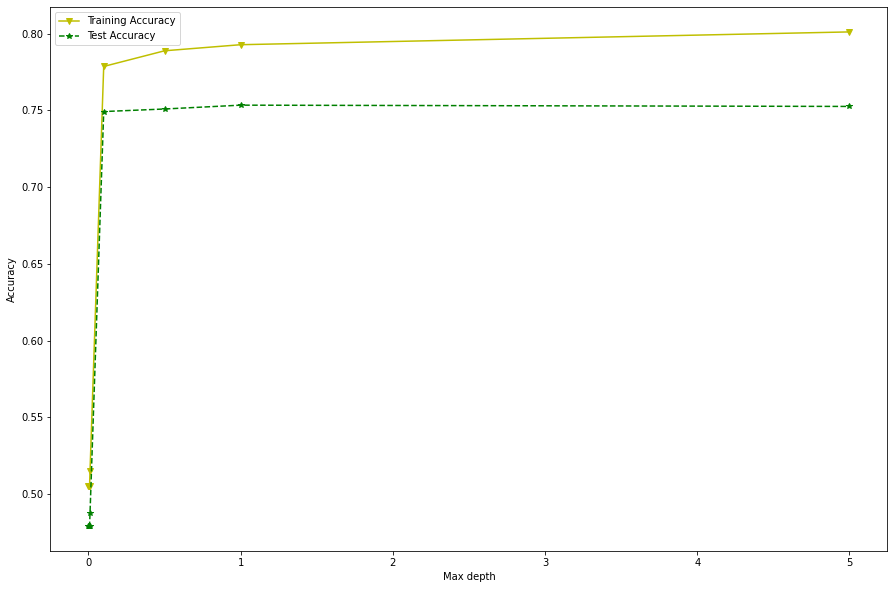

In [ ]:
# SVM
# Using RBF kernel with gamma and changing C

C = [0.000001,0.0001,0.0005,0.0008,0.001,0.003,0.005,0.007,0.01,0.1,0.5,1,5]
trainAcc = np.zeros(len(C))
testAcc = np.zeros(len(C))
index = 0
for depth in C:
    model = svm.SVC(kernel='rbf', C=depth, gamma=1)
    model_fit = model.fit(data_train, target_train)
    target_predTrain = model_fit.predict(data_train)
    target_predTest = model_fit.predict(data_test)
    trainAcc[index] = accuracy_score(target_train, target_predTrain)
    testAcc[index] = accuracy_score(target_test, target_predTest)
    index += 1

fig = plt.figure(figsize=(15, 10))
plt.plot(C,trainAcc,'yv-',C,testAcc,'g*--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

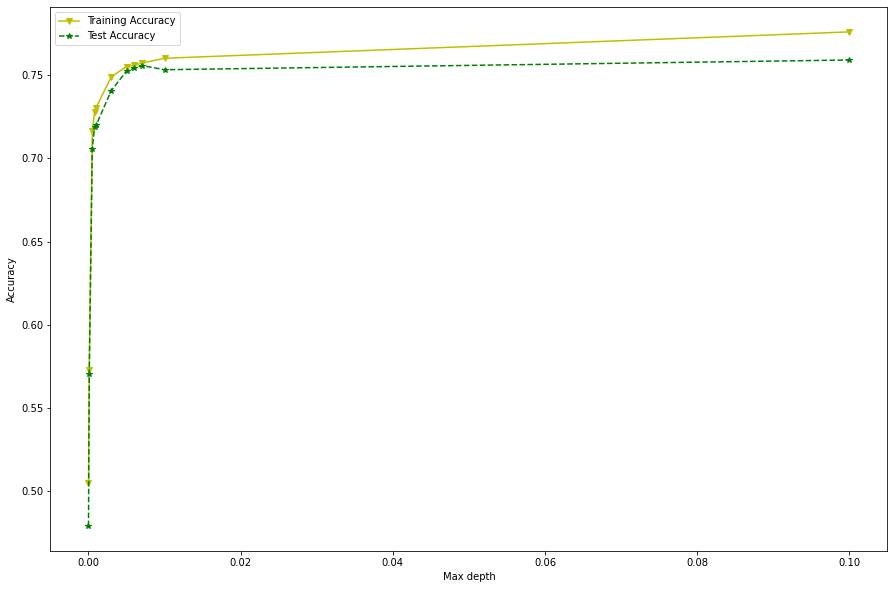

In [ ]:
# fix C and changing gamma

gamma = [0.000001,0.0001,0.0005,0.0008,0.001,0.003,0.005,0.006,0.007,0.01,0.1]
trainAcc = np.zeros(len(gamma))
testAcc = np.zeros(len(gamma))

index = 0
for depth in gamma:
    model = svm.SVC(kernel='rbf', C=1, gamma=depth)
    model_fit = model.fit(data_train, target_train)
    target_predTrain = model_fit.predict(data_train)
    target_predTest = model_fit.predict(data_test)
    trainAcc[index] = accuracy_score(target_train, target_predTrain)
    testAcc[index] = accuracy_score(target_test, target_predTest)
    index += 1
    
fig = plt.figure(figsize=(15, 10))
plt.plot(gamma,trainAcc,'yv-',gamma,testAcc,'g*--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Here we can see that although training accuracy is increasing, testing accuracy is decreasing after C = 1 and gamma = 0.007. By using a RBF kernel we can see that it affects risk of overfitting. RBF actually can make the output of the classifier sensitive to small changes in input and at the end we may have overfitting. SVM also can be sensitive to the selection of the regularisation and kernel parameters and It is possible to have overfitting with turning these hyper-parameters via e.g. cross-validation.



# Question 6
(10 points) Show examples when the use of
kernel procedure is more efficient in terms of training and
prediction computational time w.r.t. polynomial features
transformation

I use the previous dataset to test the training time that is necessarry for different kernel (linear, RBF, and polynomial).

In [ ]:
data, target = data_generate(120000)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=10)
data_train = stand.STD(data_train)
data_test = stand.STD(data_test)

clf_lin = svm.SVC(kernel = 'linear', C = 0.003, gamma = 'auto')
clf_rbf = svm.SVC(kernel = 'rbf', C = 0.003, gamma = 'auto')
clf_poly = svm.SVC(kernel = 'poly', C = 0.003, gamma = 'auto', degree = 2)

start = time()
clf_lin.fit(data_train, target_train)
print("Linear Kernel Standardized Fit Time: {} s".format(time() - start))

start = time()
clf_rbf.fit(data_train, target_train)
print("RBF Kernel Standardized Fit Time: {} s".format(time() - start))

start = time()
clf_poly.fit(data_train, target_train)
print("Polynomial Kernel Standardized Fit Time: {} s".format(time() - start))

Linear Kernel Standardized Fit Time: 287.0650990009308 s
RBF Kernel Standardized Fit Time: 357.1926028728485 s
Polynomial Kernel Standardized Fit Time: 248.97146034240723 s


The simplest kernel(mathematically) is the linear kernel function. Here we can see that the polynomial kernel has the lowest fit time. With increasing the order of the polynomial kernel, the function class size increases. An n-th order polynomial kernel gives us all analytic functions whose derivatives of order (n+1) are constant, and hence all derivatives of above order (n+2) are zero.


In [ ]:
#Transformation on data
def Transform(data):
  T1 = data[:,0] ** 2
  T2 = np.sqrt(2) * data[:,1] * data[:,0]
  T3 = data[:,1] **2
  return np.array([T1, T2, T3]).T
data_train_transformed = Transform(data_train)

In [ ]:
start = time()
clf_lin.fit(data_train_transformed, target_train)
print("Linear Kernel Standardized and transformed Fit Time: {} s".format(time() - start))

start = time()
clf_rbf.fit(data_train_transformed, target_train)
print("RBF Kernel Standardized and transformed Fit Time: {} s".format(time() - start))

start = time()
clf_poly.fit(data_train_transformed, target_train)
print("Polynomial Kernel Standardized and transformed Fit Time: {} s".format(time() - start))

Linear Kernel Standardized and transformed Fit Time: 277.5167427062988 s
RBF Kernel Standardized and transformed Fit Time: 351.7601954936981 s
Polynomial Kernel Standardized and transformed Fit Time: 304.4023892879486 s


The kernel can be more effecient when we have a larg dataset (such as my case, 120000). If we decrease the amount of data, we will have higher speed in data transformation computation. However, for larg number of data (>300000) we will have an increase in computation time of all three after transformation.
Here, I showed that with a smaller amount of data the polynomial was faster than the transformed data and linear kernel with transformed samples needs more computation than polynomial kernel. 


In [ ]:
# Results
data, target = data_generate(4500)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=10)

clf_lin = svm.SVC(kernel = 'linear')
clf_lin.fit(data_train, target_train)
clf_rbf = svm.SVC(kernel = 'rbf')
clf_rbf.fit(data_train, target_train)
clf_poly = svm.SVC(kernel = 'poly')
clf_poly.fit(data_train, target_train)

def plot_svm(clf, name):
    plt.figure(1, figsize=(15, 10))
    plt.clf()
    plt.scatter(data[:, 0], data[:, 1], c=target, zorder=10, cmap=plt.cm.Paired,
                   edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='m',
                levels=[-1, 0, 1], alpha=1,
                linestyles=['--', '-', '--'],
                linewidth=4)

    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='b');
    plt.title('Model: {}'.format(name))
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'linewidth'


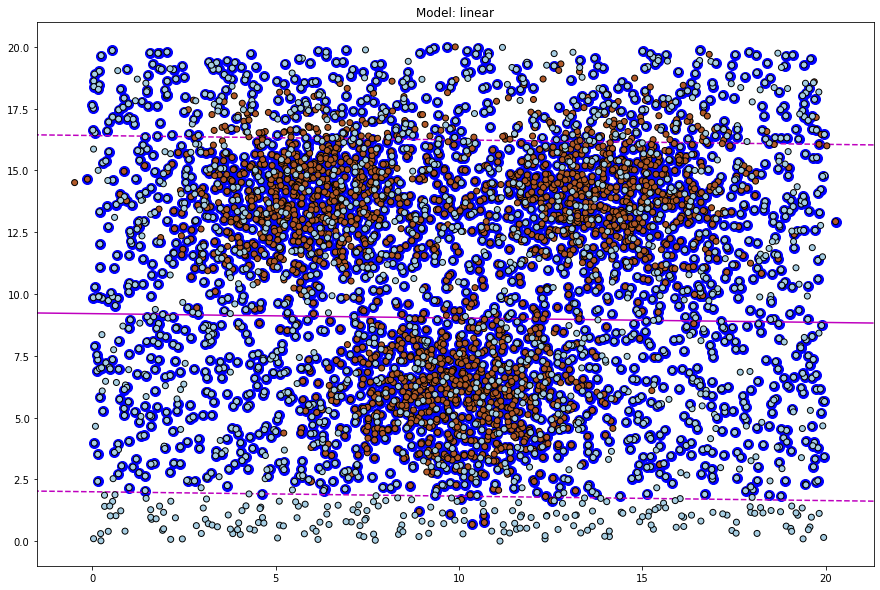

In [ ]:
cld_list=[clf_lin,clf_rbf,clf_poly]
names= ['linear', 'rbf', 'poly']
plot_svm(cld_list[0], names[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'linewidth'


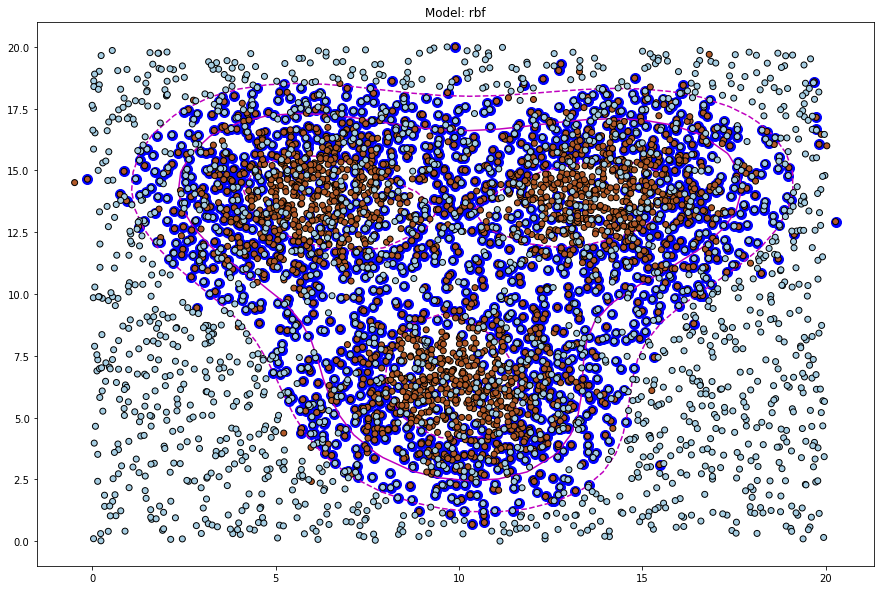

In [ ]:
plot_svm(cld_list[1], names[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'linewidth'


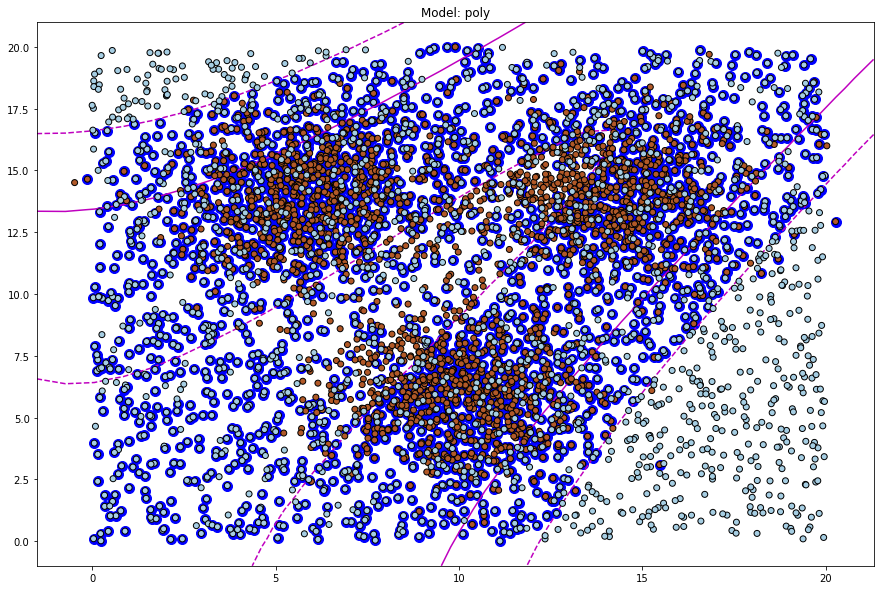

In [ ]:
plot_svm(cld_list[2], names[2])

Here we can see that polynomial and RBF are better options than the linear kernel and the RBF is the best classifier (more efficient).

# Question 7

(10 points) Write a procedure to estimate in the SVC
classifier (in Scikit) the best kernel (RBF, Polynomial,
sigmoid), the best gamma & degree, and the best C. Use the
grid search without implement it. Use the following
reference:

    a. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
    
    b. https://scikit-learn.org/stable/modules/grid_search.html

In [ ]:
data, target = data_generate(60)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=10)
param_grid = [{'kernel': ['rbf'], 'C': [0.000001,0.0001,0.001,0.01,0.1,1,10,100], 'gamma': [0.1, 0.01, 0.001, 0.0001]},
              {'kernel': ['poly'], 'C':[0.000001,0.0001,0.001,0.01,0.1,1,10,100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'degree':[1,2,3,4]},
              {'kernel':['sigmoid'], 'C': [0.000001,0.0001,0.001,0.01,0.1,1,10,100], 'gamma': [0.1, 0.01, 0.001, 0.0001]}]

model = svm.SVC()
model_fit = GridSearchCV(model, param_grid)
model_fit.fit(data_train, target_train)
print('Grid search optimum parameters for SVM:', model_fit.best_params_)
print('\nNow lets look at some classification stats:')
print(classification_report(target_test, model_fit.predict(data_test)))

Grid search optimum parameters for SVM: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Now lets look at some classification stats:
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.75      0.86      0.80         7

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12



 # Question 8
 (20 points) Create examples to explain the property and the
importance of the following kernels:
    
    a. https://en.wikipedia.org/wiki/Graph_kernel
    
    b. https://en.wikipedia.org/wiki/String_kernel

    c. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.sigmoid_kernel.html

# Graph kernel
This function can be used to measure the similarity of graphs. I will find out how to improve natural processing tasks (like text categorization) through graph kernel and graph classification methods. In text categorization, category labels are assigned to textural documents and this can create problems in many applications. I will use the graph kernel and support vector machine to solve this problem. 

In [ ]:
# Reading data from disk and doing preprocessing steps and finding the vocabulary.
import re
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

def load_file(filename):
    labels = []
    docs =[]

    with open(filename, encoding='utf8', errors='ignore') as f:
        for line in f:
            content = line.split('\t')
            labels.append(content[0])
            docs.append(content[1][:-1])
    
    return docs,labels  


def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower().split()


def preprocessing(docs): 
    preprocessed_docs = []
    n_sentences = 0
    stemmer = PorterStemmer()

    for doc in docs:
        clean_doc = clean_str(doc)
        preprocessed_docs.append([stemmer.stem(w) for w in clean_doc])
    
    return preprocessed_docs
    
    
def get_vocab(train_docs, test_docs):
    vocab = dict()
    
    for doc in train_docs:
        for word in doc:
            if word not in vocab:
                vocab[word] = len(vocab)

    for doc in test_docs:
        for word in doc:
            if word not in vocab:
                vocab[word] = len(vocab)
        
    return vocab


path_to_train_set = '/content/drive/MyDrive/Spring 2022-MS-Semester2/ML/Midterm/train_5500_coarse.label'
path_to_test_set = '/content/drive/MyDrive/Spring 2022-MS-Semester2/ML/Midterm/TREC_10_coarse.label'

# Read and pre-process train data
train_data, y_train = load_file(path_to_train_set)
train_data = preprocessing(train_data)

# Read and pre-process test data
test_data, y_test = load_file(path_to_test_set)
test_data = preprocessing(test_data)

# Extract vocabulary
vocab = get_vocab(train_data, test_data)
print("Vocabulary size: ", len(vocab))

Vocabulary size:  7186


The following finction will transform a list of documents to a list of graphs and generate train and test graphs. I consider that the size of the window is 3.

Example of graph-of-words representation of document


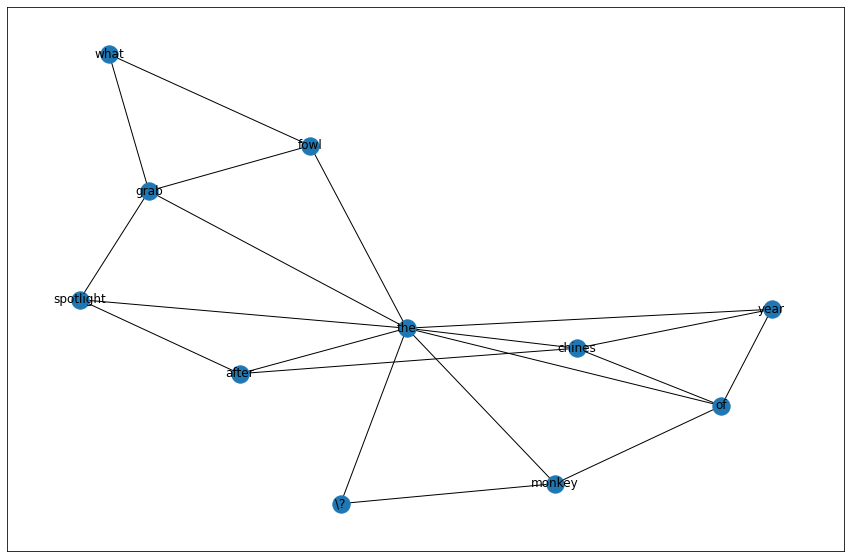

In [ ]:
# Transforming documents to graphs and applying graph classification. 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def create_graphs_of_words(docs, vocab, window_size):
    graphs = list()
    sizes = list()
    degs = list()

    for idx,doc in enumerate(docs):
        G = nx.Graph()
        for i in range(len(doc)):
            if doc[i] not in G.nodes():
                G.add_node(doc[i])
                G.nodes[doc[i]]['label'] = vocab[doc[i]]
        for i in range(len(doc)):
            for j in range(i+1, i+window_size):
                if j < len(doc):
                    G.add_edge(doc[i], doc[j])
        
        graphs.append(G)
    
    return graphs


# Create graph-of-words representations
G_train_nx = create_graphs_of_words(train_data, vocab, 3) 
G_test_nx = create_graphs_of_words(test_data, vocab, 3)

print("Example of graph-of-words representation of document")
plt.figure(1, figsize=(15, 10))
nx.draw_networkx(G_train_nx[3], with_labels=True)

In [ ]:
!pip install grakel

The following function (first one) will convert the NetworkX to objects. I will use a Weisfeiler Lehman subtree kernel to create the two kernel matrices. In the end, by training an SVM we will make predictions.

In [ ]:
from grakel.utils import graph_from_networkx
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Transform networkx graphs to grakel representations
G_train = list(graph_from_networkx(G_train_nx, node_labels_tag='label'))
G_test = list(graph_from_networkx(G_test_nx, node_labels_tag='label'))

# Initialize a Weisfeiler-Lehman subtree kernel
gk = WeisfeilerLehman(n_iter=1, normalize=False)

# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

# Train an SVM classifier and make predictions
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train) 
y_pred = clf.predict(K_test)

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.858


String kernel

String kernel can help us to develop other well-known methods (such as data clustering and classification). We can mostly see its application in text comparison and gene analysis. To measure similarity between two strings we can use this kernel function. Each string must have a measurment of similarity if we want to use SVM with strings.We need to know the number of k-mers in the string, therefore, we can show a string as a numerical sequence and we can caculate two strings similarity through different kernel (like dot products/ linear kernel). Some sequences (such as RNA, DNA) with certain differences to normal strings are used in SVMs. For example, motif, gappy-pair, and mismatch (I use in this question) kernel.
We can use mismatch kernel with SVMs in a discriminative method to a classification problem. It measures the sequence similarity based on shared occurrences of k-length subsequences, counted with up to m mismatches, which is what we generally state as (k, m)-mismatch. We can actually calculated the kernel with a mismatch tree. To do that, we need following inputs:
1) data: n_ sample and n_featurea, that can give a 2D matrix of shape, comuting sequences as kernel.
2) l: int, alphabet size. 
3) To compute the kernel, we will use k:int in k-mers.
4) m: int, generally, we can consider small values. To considere 2 k-mers similar, we need max number of mismatches.
5) kernel: (n_samples, n_samples) matrix can give similarities between sequences.

Pairwise Sigmoid Kenels:

This function (aka hyperbolic tangent or multilayer perceptron) actually calculates the sigmoid kernels between two vectors. It is called multilayerultilayer perceptron because in NN, it is used as neural activation function. Because it is originated from NN theory, it is common for SVMs and it can works precisly. This function have a S shape curve or sigmoid curve with slope of s (usually equals 1/N where N is dimonsion of data) and intercept of c. Some studies show that generally, this kernel function is not better than the RBF kernel. The results from sigmoid kernel is usually between 0 and 1 but we can also see results from -1 to 1.
Sigmoid kernel between x and y can be calculated like:

k(x,y) = tanh(sx^T*y+c)